 ## Causal Analysis of Enrollment in Healthcare Assistance Programs and Their Impact on Health Service Utilization

### About the data?
The dataset originates from submissions made by states to the Centers for Medicare & Medicaid Services (CMS) as mandated by the Medicare Modernization Act (MMA). These submissions occur on at least a monthly basis and contain data on individuals who are enrolled in both Medicare and Medicaid, also known as dual enrollees. The data includes counts of such individuals classified by various eligibility types and is provided at both the state and county levels. Data is typically captured from a monthly perspective as a result. For live database visit: https://cloud.google.com and search through Google Marketplace: Medicare Dual Enrollment.

### Healthcare Problem
A healthcare insurance company wants to understand the impact of a new wellness program designed to **reduce** hospital readmissions. The company believes that by **enrolling high-risk patients** in this program, they can improve patient health outcomes and reduce costs associated with readmissions. **A model assumption is needed.**

#### Why Causal Inference? - Hypothetical Scenario
The company can use causal inference to estimate the effect of the wellness program on readmission rates. This would involve comparing patients who were enrolled in the program (treatment group) with a comparable group of patients who were not enrolled (control group).

To address confounding variables (such as age, gender, comorbidities, etc.) that might influence both the likelihood of being enrolled in the program and the readmission rate, the company could use statistical techniques to solve the **bussines problem**.

- **Treatment** : Enrollment in the wellness program.
- **Outcome**: Hospital readmission rates within 30 days of discharge.)

By accurately measuring the program's effectiveness, the company can make informed decisions about scaling the program, making adjustments, or potentially discontinuing it if it's not effective.

### Basic Data Dictionary
Define categorical fields with defintions 

- 'Date': date is stored in YYYY-DD-MM formatt
- 'State_Abbr': State of beneficiary
- 'County_Name': County Name of beneficiary
- 'QMB_Only': Number of Qualified Medicare Beneficiary Program - Only Enrolles
- 'QMB_plus_Full': Number of Qualified Medicare Beneficiary Program - Full Medicaid Enrolles
- 'SLMB_only': Number of Specified Low Income Medicare Beneficiary - Only Enrolles
- 'SLMB_plus_Full': Number of Specified Low Income Medicare Beneficiary - Full Medicaid Enrolles
- 'QDWI': Number of Qualifying Disabled Working Individual - Enrolles
- 'QI': Number of Qualifying Working Individual - Enrolles
- 'Other_full': Number of Other Dual Full Medicaid - Enrolees
- 'Public_Total': Total Enrolles Across All Dual Eligible Programs
- 'FIPS': Geo FIPS Code (Geograpic Code)


In [12]:
# Libraries Used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('dual.csv')
data.head(5)

,State_Abbr,County_Name,QMB_Only,QMB_plus_Full,SLMB_only,SLMB_plus_Full,QDWI,QI,Other_full,Public_Total,Date,FIPS
0,AL,Autauga,668,558,332,35.0,0.0,244,132.0,1969,2018-12-01,1001
1,AL,Autauga,662,549,328,36.0,0.0,236,139.0,1950,2018-09-01,1001
2,AL,Autauga,661,551,330,36.0,0.0,241,129.0,1948,2018-06-01,1001
3,AL,Autauga,671,567,323,33.0,0.0,234,119.0,1947,2018-03-01,1001
4,AL,Autauga,676,572,324,30.0,0.0,229,126.0,1957,2017-12-01,1001


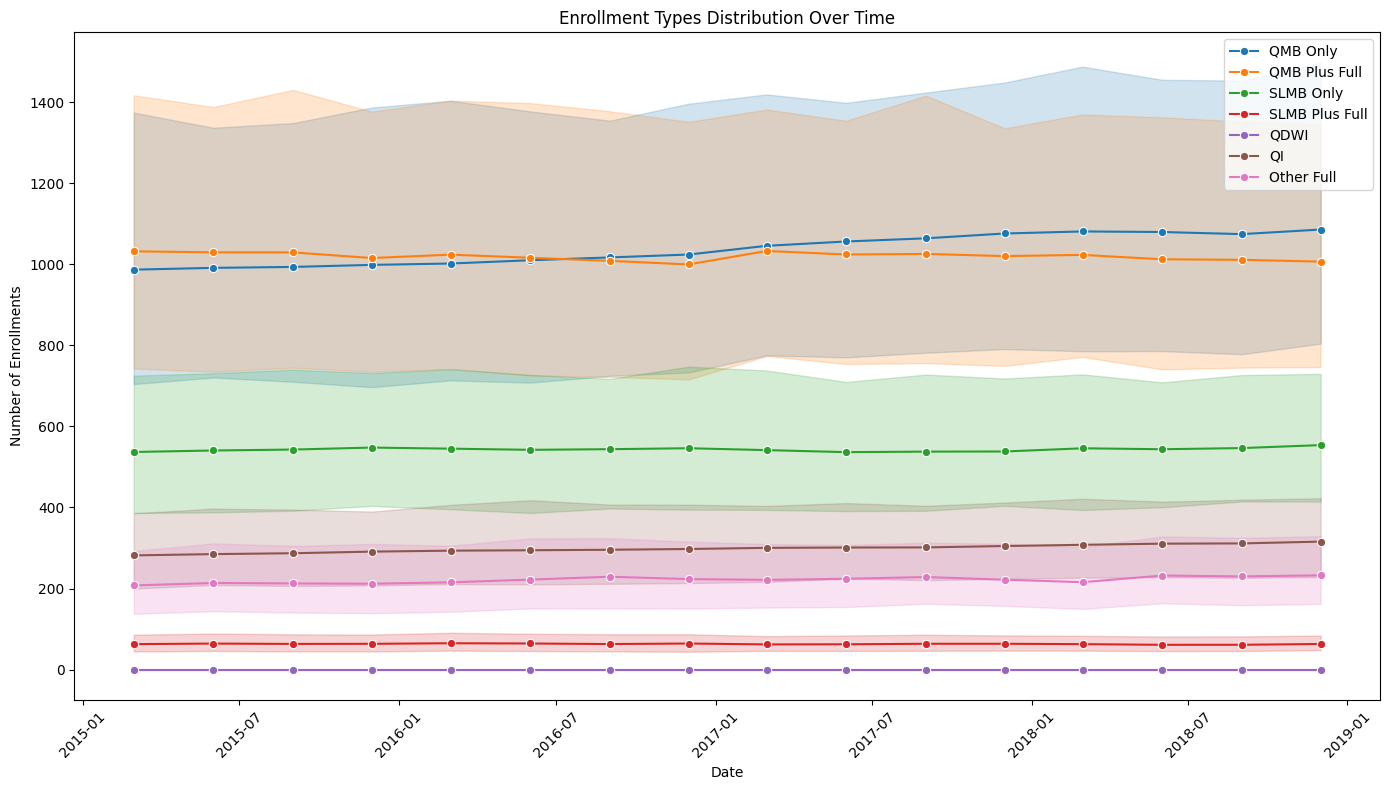

In [15]:
## Distribution of Enrollments across time
# Ensure 'Date' is in datetime format for proper plotting
data['Date'] = pd.to_datetime(data['Date'])

# Setting the figure size for better readability
plt.figure(figsize=(14, 8))

# Plotting each enrollment type over time
sns.lineplot(x='Date', y='QMB_Only', data=data, label='QMB Only', marker='o')
sns.lineplot(x='Date', y='QMB_plus_Full', data=data, label='QMB Plus Full', marker='o')
sns.lineplot(x='Date', y='SLMB_only', data=data, label='SLMB Only', marker='o')
sns.lineplot(x='Date', y='SLMB_plus_Full', data=data, label='SLMB Plus Full', marker='o')
sns.lineplot(x='Date', y='QDWI', data=data, label='QDWI', marker='o')
sns.lineplot(x='Date', y='QI', data=data, label='QI', marker='o')
sns.lineplot(x='Date', y='Other_full', data=data, label='Other Full', marker='o')

# Enhancing the plot
plt.title('Enrollment Types Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Enrollments')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()



## Data Cleaning - County Names Found Duplicate

In [26]:
# Getting the distinct list of counties
distinct_counties = data['County_Name'].unique()

# Printing the number of distinct counties
print(f"Total distinct counties: {len(distinct_counties)}")

# Optionally, printing the list of distinct counties
print(distinct_counties)


Total distinct counties: 125
['Autauga' 'AUTAUGA' 'Baldwin' 'BALDWIN' 'Barbour' 'BARBOUR' 'Bibb' 'BIBB'
 'Blount' 'BLOUNT' 'Bullock' 'BULLOCK' 'Butler' 'BUTLER' 'Calhoun'
 'CALHOUN' 'Chambers' 'CHAMBERS' 'Cherokee' 'CHEROKEE' 'Chilton' 'CHILTON'
 'Choctaw' 'CHOCTAW' 'Clarke' 'CLARKE' 'Clay' 'CLAY' 'Cleburne' 'CLEBURNE'
 'Coffee' 'COFFEE' 'Colbert' 'COLBERT' 'Conecuh' 'CONECUH' 'Coosa' 'COOSA'
 'Covington' 'COVINGTON' 'Crenshaw' 'CRENSHAW' 'Cullman' 'CULLMAN' 'Dale'
 'DALE' 'Dallas' 'DALLAS' 'DeKalb' 'DE KALB' 'Elmore' 'ELMORE' 'Escambia'
 'ESCAMBIA' 'Etowah' 'ETOWAH' 'Fayette' 'FAYETTE' 'Franklin' 'FRANKLIN'
 'Geneva' 'GENEVA' 'Greene' 'GREENE' 'Hale' 'HALE' 'Henry' 'HENRY'
 'Houston' 'HOUSTON' 'Jackson' 'JACKSON' 'Jefferson' 'JEFFERSON' 'Lamar'
 'LAMAR' 'Lauderdale' 'LAUDERDALE' 'Lawrence' 'LAWRENCE' 'Lee' 'LEE'
 'Limestone' 'LIMESTONE' 'Lowndes' 'LOWNDES' 'Macon' 'MACON' 'Madison'
 'MADISON' 'Marengo' 'MARENGO' 'Marion' 'MARION' 'Marshall' 'MARSHALL'
 'Mobile' 'MOBILE' 'Monroe' 'MONR

In [27]:
# Normalize 'County_Name' to uppercase
data['County_Name'] = data['County_Name'].str.upper()

# Getting the distinct list of counties after normalization
distinct_counties_normalized = data['County_Name'].unique()

# Printing the number of distinct counties after normalization
print(f"Total distinct counties after normalization: {len(distinct_counties_normalized)}")

# Optionally, printing the list of distinct counties after normalization
print(distinct_counties_normalized)


Total distinct counties after normalization: 64
['AUTAUGA' 'BALDWIN' 'BARBOUR' 'BIBB' 'BLOUNT' 'BULLOCK' 'BUTLER'
 'CALHOUN' 'CHAMBERS' 'CHEROKEE' 'CHILTON' 'CHOCTAW' 'CLARKE' 'CLAY'
 'CLEBURNE' 'COFFEE' 'COLBERT' 'CONECUH' 'COOSA' 'COVINGTON' 'CRENSHAW'
 'CULLMAN' 'DALE' 'DALLAS' 'DEKALB' 'DE KALB' 'ELMORE' 'ESCAMBIA' 'ETOWAH'
 'FAYETTE' 'FRANKLIN' 'GENEVA' 'GREENE' 'HALE' 'HENRY' 'HOUSTON' 'JACKSON'
 'JEFFERSON' 'LAMAR' 'LAUDERDALE' 'LAWRENCE' 'LEE' 'LIMESTONE' 'LOWNDES'
 'MACON' 'MADISON' 'MARENGO' 'MARION' 'MARSHALL' 'MOBILE' 'MONROE'
 'MONTGOMERY' 'MORGAN' 'PERRY' 'PICKENS' 'PIKE' 'RANDOLPH' 'RUSSELL'
 'ST. CLAIR' 'SHELBY' 'SUMTER' 'TALLADEGA' 'TALLAPOOSA' 'TUSCALOOSA']


In [28]:
# Replace 'DE KALB' with 'DEKALB' to ensure consistency
data['County_Name'] = data['County_Name'].str.replace('DE KALB', 'DEKALB')

# Getting the updated list of distinct counties after normalization and replacement
distinct_counties_final = data['County_Name'].unique()

# Printing the number of distinct counties after final normalization
print(f"Total distinct counties after final normalization: {len(distinct_counties_final)}")

# Optionally, printing the list of distinct counties after final normalization
print(distinct_counties_final)


Total distinct counties after final normalization: 63
['AUTAUGA' 'BALDWIN' 'BARBOUR' 'BIBB' 'BLOUNT' 'BULLOCK' 'BUTLER'
 'CALHOUN' 'CHAMBERS' 'CHEROKEE' 'CHILTON' 'CHOCTAW' 'CLARKE' 'CLAY'
 'CLEBURNE' 'COFFEE' 'COLBERT' 'CONECUH' 'COOSA' 'COVINGTON' 'CRENSHAW'
 'CULLMAN' 'DALE' 'DALLAS' 'DEKALB' 'ELMORE' 'ESCAMBIA' 'ETOWAH' 'FAYETTE'
 'FRANKLIN' 'GENEVA' 'GREENE' 'HALE' 'HENRY' 'HOUSTON' 'JACKSON'
 'JEFFERSON' 'LAMAR' 'LAUDERDALE' 'LAWRENCE' 'LEE' 'LIMESTONE' 'LOWNDES'
 'MACON' 'MADISON' 'MARENGO' 'MARION' 'MARSHALL' 'MOBILE' 'MONROE'
 'MONTGOMERY' 'MORGAN' 'PERRY' 'PICKENS' 'PIKE' 'RANDOLPH' 'RUSSELL'
 'ST. CLAIR' 'SHELBY' 'SUMTER' 'TALLADEGA' 'TALLAPOOSA' 'TUSCALOOSA']


/var/folders/55/6xmr2dls3kl02hf3b8mx94qw0000gn/T/ipykernel_7504/2790474648.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='County_Name', y='SLMB_only', data=top_10_counties_slmb_only, palette='viridis')


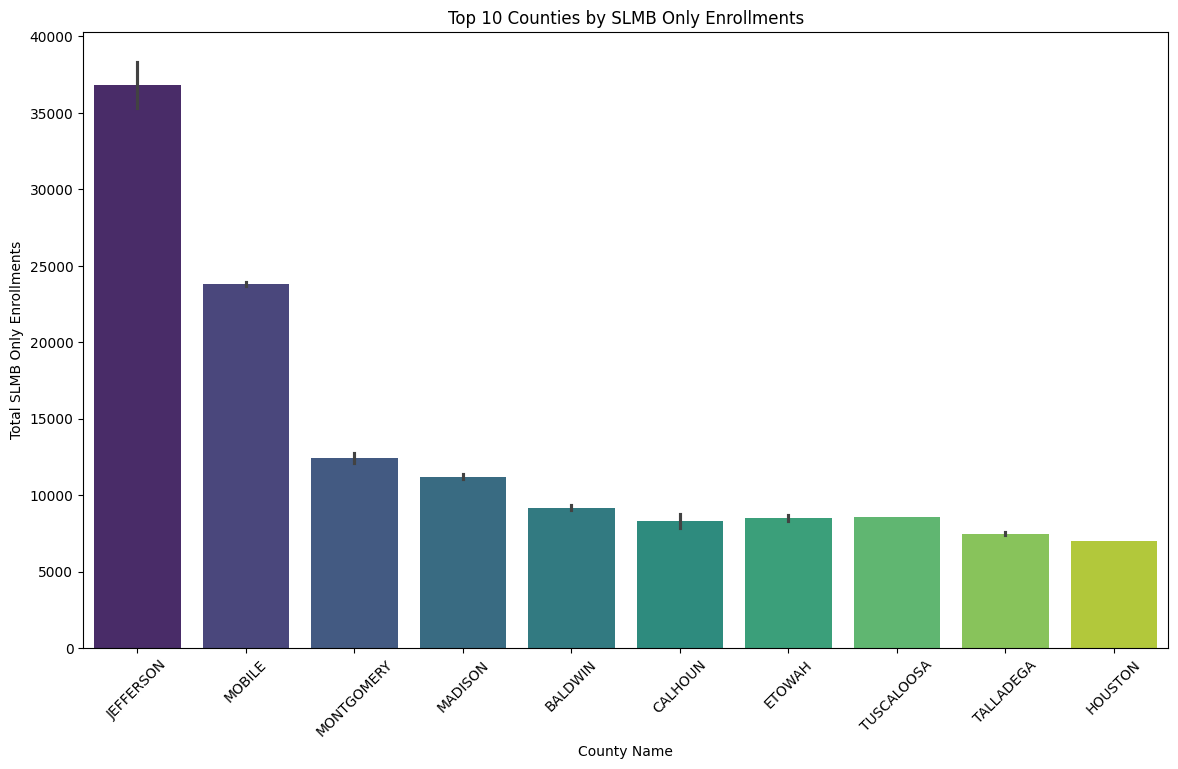

In [34]:
# Normalize 'County_Name' to uppercase and consolidate naming inconsistencies
county_data['County_Name'] = county_data['County_Name'].str.upper().replace('DE KALB', 'DEKALB')

# Now, assuming 'county_data' is updated and has the aggregated and summed enrollment data

# Sorting the aggregated data to find the top 10 counties for 'SLMB_only' enrollments
top_10_counties_slmb_only = county_data.sort_values(by='SLMB_only', ascending=False).head(18)

# Plotting 'SLMB_only' enrollments for the top 10 counties
plt.figure(figsize=(14, 8))
# Use the normalized 'County_Name' for plotting
sns.barplot(x='County_Name', y='SLMB_only', data=top_10_counties_slmb_only, palette='viridis')
plt.title('Top 10 Counties by SLMB Only Enrollments')
plt.xlabel('County Name')
plt.ylabel('Total SLMB Only Enrollments')
plt.xticks(rotation=45)
plt.show()

